## seaborn

* box plot, violin plot: 데이터 분포와 이상치 확인
* heatmap, count plot, pair plot

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()

In [88]:
# Get Data
production_df = pd.read_csv('./data/05_production.csv', parse_dates=['production_date'])
sensor_df = pd.read_csv('./data/08_sensor_data.csv', parse_dates=['measurement_time'])
production_df['불량률'] = (production_df['defect_quantity']/production_df['actual_quantity']*100).round(2)

### boxplot: IQR 방식의 데이터 분포 및 이상치 확인

최솟값, Q1, 중앙값(Q2), Q3, 최댓값

* A교대조 생산량이 낮음 -> 박스 플롯으로 교대조별 비교
* B제품의 불량률 높음 -> 바이올린 플롯으로 분포 형태 확인
* 특정 날짜에 급격한 변화 발생 -> 이상치로 문제 시점 발견

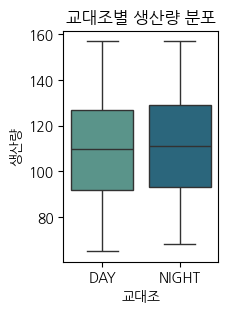

In [89]:
# 교대조별 생산량 확인
plt.figure(figsize=(2, 3))
sns.boxplot(data=production_df, x='shift', y='actual_quantity', hue='shift',
            palette='crest')

plt.title('교대조별 생산량 분포')
plt.xlabel('교대조')
plt.ylabel('생산량')

plt.show()

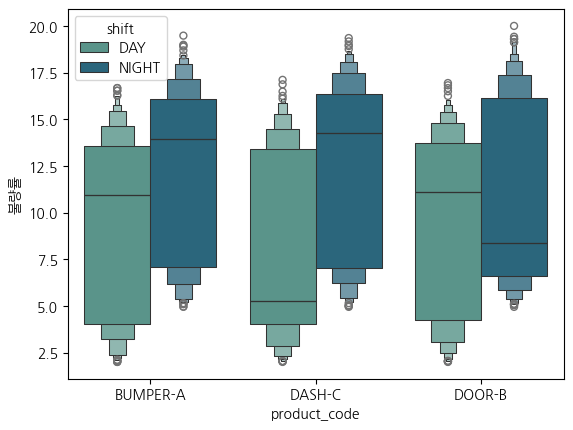

In [90]:
# 제품별 불량률 확인
sns.boxenplot(data=production_df, x='product_code', y='불량률', hue='shift',
              palette='crest')

plt.show()

### violinplot: 카테고리별 분포 확인

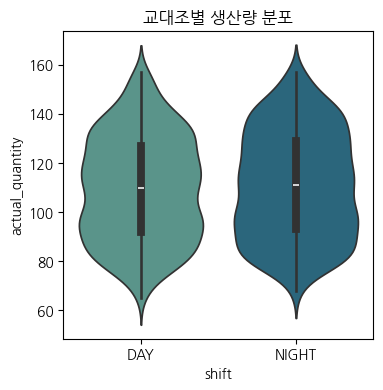

In [91]:
# 교대조별 생산량 분포 확인
plt.figure(figsize=(4, 4))
sns.violinplot(data=production_df, x='shift', y='actual_quantity', hue='shift',
               palette='crest')

plt.title('교대조별 생산량 분포')

plt.show()

### heatmap: 데이터의 밀도를 색으로 표현

In [92]:
# 센서 데이터의 관계
# 1에 가까움: 비례 관계
# -1에 가까움: 반비례 관계
# 0 근처: 관계 없음
sensor_corr = sensor_df.loc[:, 'temperature':'current'].corr()
sensor_corr

,temperature,pressure,vibration,current
temperature,1.000000,0.450458,0.104163,-0.099645
pressure,0.450458,1.000000,0.837068,0.840483
vibration,0.104163,0.837068,1.000000,0.872423
current,-0.099645,0.840483,0.872423,1.000000


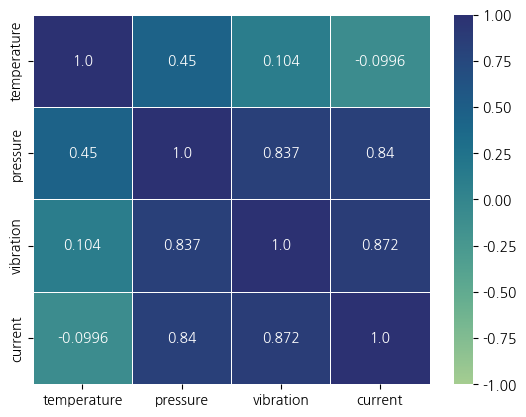

In [101]:
sns.heatmap(data=sensor_corr, cmap='crest', vmin=-1, vmax=1, annot=True, fmt='.3', linewidths=0.5)

plt.show()

### countplot: 컬럼의 카테고리별 데이터 개수를 차트로 표시

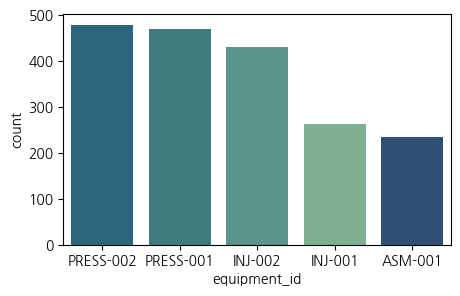

In [94]:
# 설비별 생산 건수 확인
my_order = production_df['equipment_id'].value_counts().index

plt.figure(figsize=(5, 3))
sns.countplot(data=production_df, x='equipment_id', hue='equipment_id', order=my_order,
              palette='crest')

plt.show()

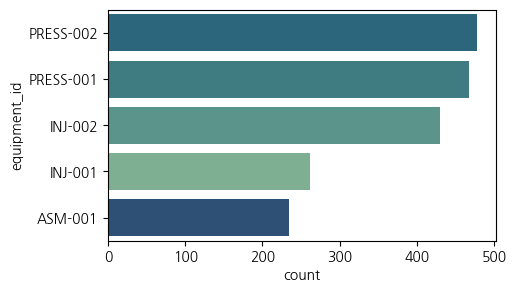

In [95]:
plt.figure(figsize=(5, 3))
sns.countplot(data=production_df, y='equipment_id', hue='equipment_id', order=my_order,
              palette='crest')

plt.show()

### pairplot: 여러 칼럼 사이의 관계 확인
* plt.scatter는 두 컬럼의 관계

In [99]:
sensor_sample = sensor_df.sample(n=500, random_state=12) # 무작위로 n개 선정
sensor_sample

,sensor_id,equipment_id,measurement_time,temperature,pressure,vibration,current,voltage,rpm,created_at
10542,10543,PRESS-001,2024-03-28 20:00:00,86.82,207.77,3.4907,122.08,378.50,488.65,2026-01-30 00:45:52
351,352,INJ-002,2024-01-03 22:00:00,174.05,141.64,2.3543,42.73,221.67,1778.63,2026-01-30 00:45:52
9052,9053,PRESS-001,2024-03-16 10:00:00,87.41,199.85,3.3557,118.84,376.13,492.94,2026-01-30 00:45:52
2931,2932,INJ-002,2024-01-25 10:00:00,175.04,138.09,2.4692,46.62,214.67,1731.19,2026-01-30 00:45:52
8372,8373,PRESS-001,2024-03-10 18:00:00,85.77,200.43,3.6889,123.56,388.74,516.70,2026-01-30 00:45:52
...,...,...,...,...,...,...,...,...,...,...
10082,10083,PRESS-001,2024-03-25 00:00:00,83.36,196.13,3.5098,120.98,383.54,518.91,2026-01-30 00:45:52
3693,3694,PRESS-002,2024-01-31 18:00:00,88.20,190.50,3.6243,118.04,380.99,495.70,2026-01-30 00:45:52
1783,1784,PRESS-002,2024-01-15 20:00:00,88.42,199.35,3.5853,118.70,374.12,532.58,2026-01-30 00:45:52
520,521,INJ-001,2024-01-05 08:00:00,181.81,148.10,2.5379,45.59,214.05,1821.08,2026-01-30 00:45:52


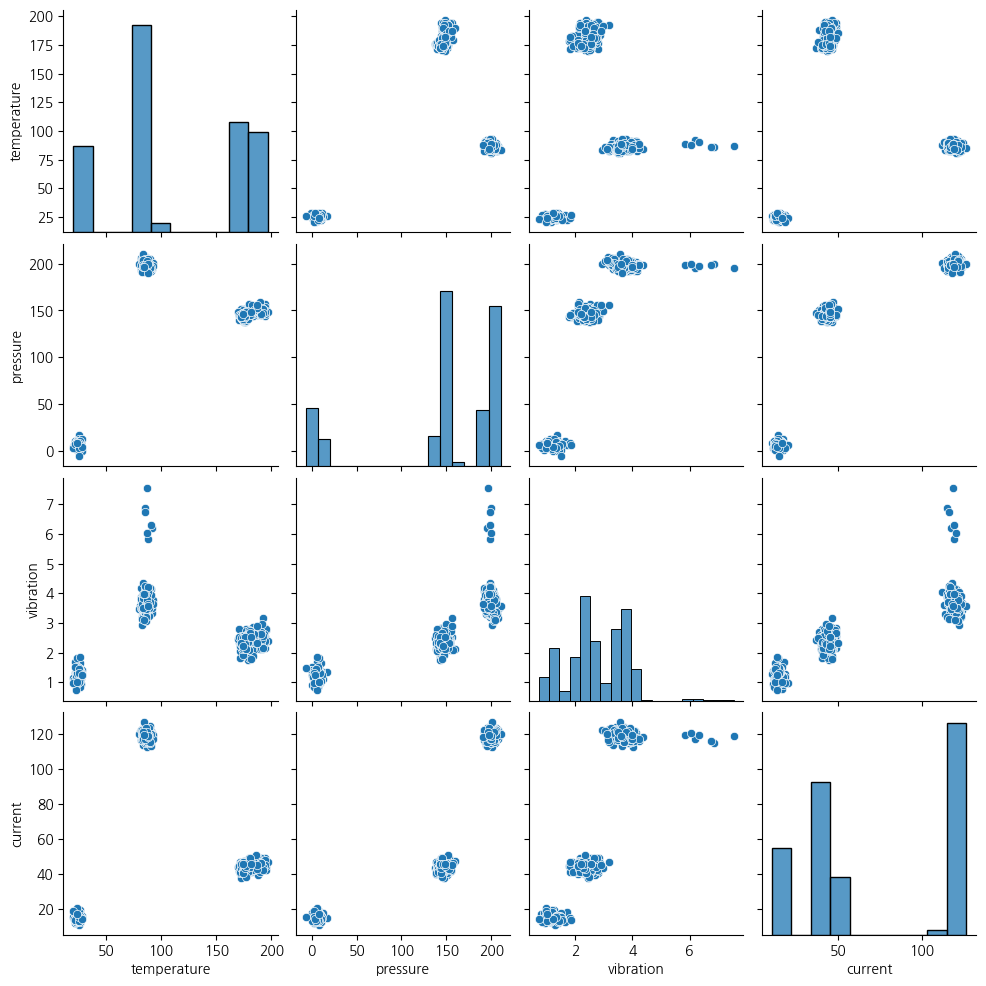

In [105]:
sns.pairplot(data=sensor_sample.loc[:, 'temperature':'current'])

plt.show()

In [121]:
# 제품별 생산량, 불량 개수, 불량률, 사이클타임의 관계
prod_df = production_df[['actual_quantity', 'defect_quantity', '불량률', 'cycle_time', 'product_code']].sample(500)
prod_df

,actual_quantity,defect_quantity,불량률,cycle_time,product_code
420,79,5,6.33,83.80,BUMPER-A
1283,94,15,15.96,88.08,DASH-C
311,130,9,6.92,86.24,DASH-C
1289,82,14,17.07,61.24,BUMPER-A
376,115,4,3.48,77.86,BUMPER-A
...,...,...,...,...,...
1339,138,19,13.77,81.60,DASH-C
1007,112,18,16.07,84.78,DASH-C
1688,120,22,18.33,73.42,BUMPER-A
1595,89,10,11.24,73.70,BUMPER-A


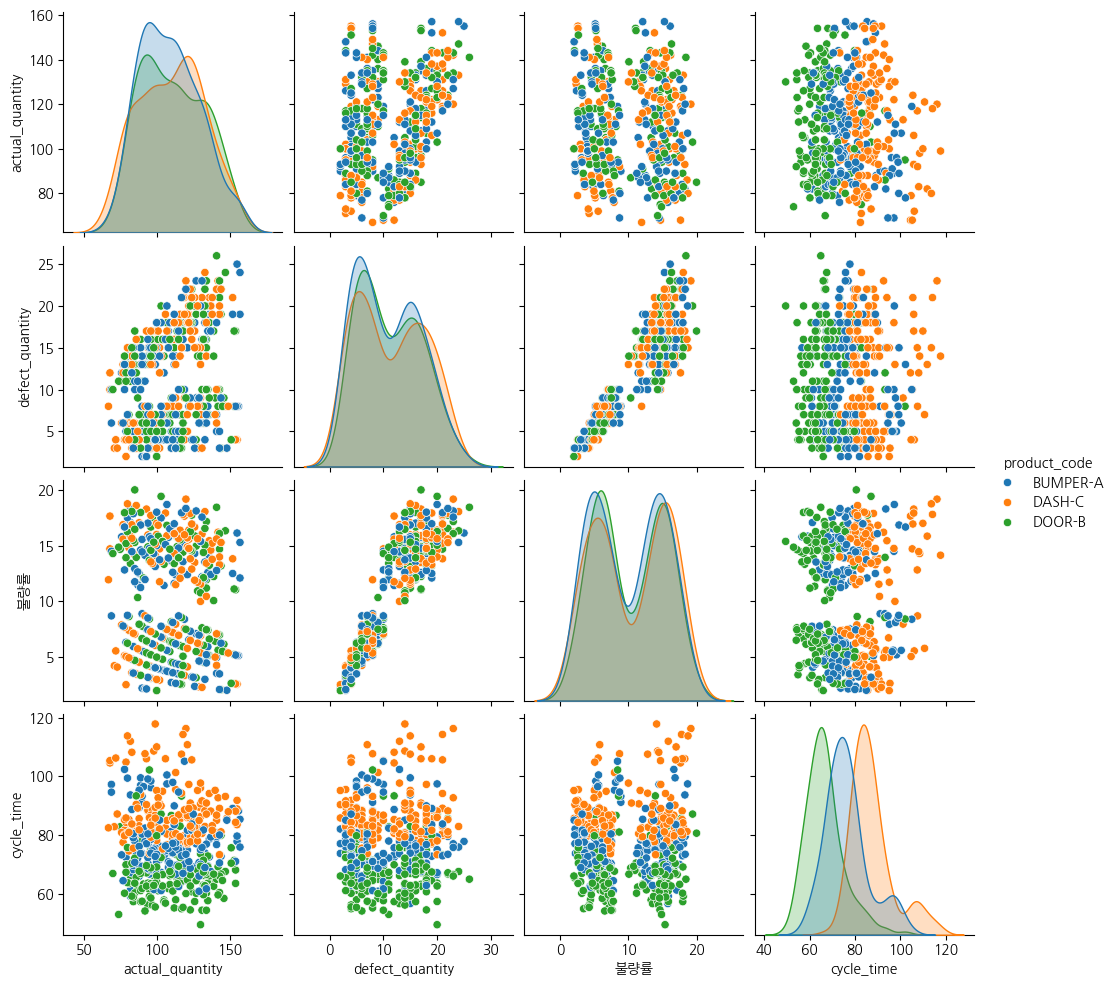

In [122]:
sns.pairplot(data=prod_df, hue='product_code')

plt.show()

### pointplot: 평균(point)과 신뢰구간(오차 막대로 표현, errorbar)을 점과 선으로 연결

In [123]:
# 제품 - 교대조별 평균 생산량
production_df.groupby(['product_code', 'shift'])['actual_quantity'].mean()

product_code  shift
BUMPER-A      DAY      109.024540
              NIGHT    110.537267
DASH-C        DAY      110.628866
              NIGHT    111.465753
DOOR-B        DAY      109.576803
              NIGHT    111.096273
Name: actual_quantity, dtype: float64

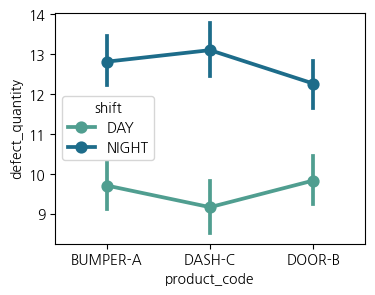

In [150]:
plt.figure(figsize=(4, 3))
sns.pointplot(data=production_df, x='product_code', y='defect_quantity', hue='shift', palette='crest')

plt.show()

In [128]:
production_df.groupby('product_code')['불량률'].mean()

product_code
BUMPER-A    10.376590
DASH-C      10.121681
DOOR-B      10.158986
Name: 불량률, dtype: float64

### barplot: 카테고리별 데이터 비교
* 오차 막대(errorbar): 신뢰구간(기본: 95%)

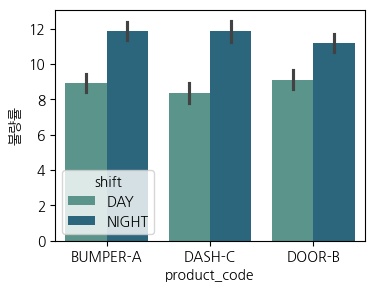

In [131]:
# 제품별 평균 불량률
plt.figure(figsize=(4, 3))
sns.barplot(data=production_df, x='product_code', y='불량률', hue='shift', palette='crest')

plt.show()

### stripplot: 분포를 확인할 수 있는 막대 형태의 점 그래프

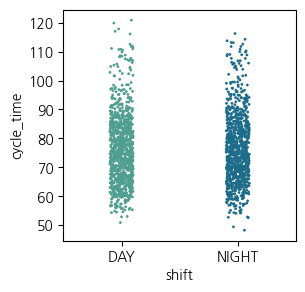

In [147]:
# 교대조별 사이클 타임 분포
plt.figure(figsize=(3, 3))
sns.stripplot(data=production_df, x='shift', y='cycle_time', hue='shift',
              palette='crest', size=2)

plt.show()

### swarmplot: stripplot + 분산

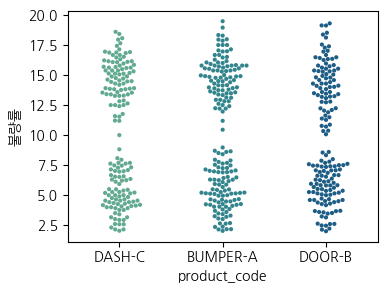

In [146]:
# 제품별 불량률
plt.figure(figsize=(4, 3))
sns.swarmplot(data=production_df.sample(500), x='product_code', y='불량률', hue='product_code',
              palette='crest', size=3)

plt.show()